# Лабораторная работа 1: решение задачи классификации

# Создание набора данных

In [22]:
from sklearn.datasets import make_classification

size1 = 50  # Размер первой выборки
size2 = 500 # Размер второй выборки

# Первый и второй наборы данных состоят из
# 2-х особенностей (n_features)
# 2-х значимых особенностей (n_informative) из всех (n_features). Например, размер опухоли и ее возраст
# Следовательно, 0 избыточных и дублирующих особенностей (n_reduntant и n_repeated, соответственно)
# 0 дублирующих особенностей (n_repeated),
# так как n_informative + n_redundant + n_repeated <= n_features

# Нулевая доля выборок, класс которых обменивается случайным образом (flip_y)

X1, T1 = make_classification(n_samples = size1, n_features=2,
                           n_redundant=0, n_informative=2, flip_y=0)

X2, T2 = make_classification(n_samples = size2, n_features=2,
                           n_redundant=0, n_informative=2, flip_y=0)

# Где
# X1 и X2 - первая и вторая выборки (датасеты)
# T1 и T2 - метки (классы), первого и второго наборов данных, соответственно

# Приведем значения элементов множества меток к величинам 1 и -1

T1 = T1*2-1
T2 = T2*2-1

# Разделение наборов данных на обучающие и тестовые в пропорции 80:20

In [23]:
import numpy as np

split_size = 0.8

train_size1 = int(len(X1)*split_size)
test_size1 = len(X1) - train_size1

train_size2 = int(len(X2)*split_size)
test_size2 = len(X2) - train_size2

train_x1 = np.copy(X1[0:train_size1])
train_t1 = np.copy(T1[0:train_size1])

train_x2 = np.copy(X2[0:train_size2])
train_t2 = np.copy(T2[0:train_size2])

print("Features:\n",train_x1[0:4])
print("Labels:\n",train_t1[0:4])

Features:
 [[ 0.7540441   2.38037822]
 [ 0.84831102 -0.82680857]
 [ 2.71588991  1.79915029]
 [ 1.15503676 -1.20968701]]
Labels:
 [1 1 1 1]


# Алгоритм обучения: метод градиентного спуска

In [24]:
# Критерием персептрона является отрицательная сумма по неправильно классифицированным точкам
# Градиент критерия персептрона равен h * x_k * t_k, 
# где k является номером элемента из множества неправильно классифицированных точек

def gradientDescentMethod(X, T):
    num_features = X.shape[1] # Размер обучающей выборки
    weights = np.zeros(num_features) # Инициализируем веса нулями
    h = 1 # Постоянный шаг
    
    for i in range(X.shape[0]):
        z = np.dot(weights,X[i]) # Произведение матриц весов и X_i = ||X_ij||, где i = 1,...n, j = 1,...k,
        if(((z>=0) and (T[i]<0)) or ((z<0) and (T[i]>0))): # Если точка выше прямой (1 класс) и имеет 2 класс, то внести в критерий персептрона и наоборот
            weights = weights + h*X[i]*T[i]
            
    return weights

# Обучение персептрона

In [25]:
wts1 = gradientDescentMethod(train_x1, train_t1)
wts2 = gradientDescentMethod(train_x2, train_t2)

# Создание процедуры отображения графика функции

In [26]:
import pylab

def functionGraphCreation(train_x, train_t, weights):
    first_features = np.array([ [t[0],t[1]] for i,t in enumerate(train_x) 
                          if train_t[i]>0])
    second_features = np.array([ [t[0],t[1]] for i,t in enumerate(train_x) 
                          if train_t[i]<0])
    x = np.array([-8, 8], dtype='float32')
    y = -(weights[0] * x)/weights[1]
    pylab.xlim(-4, 4)
    pylab.ylim(-4, 4) 
    pylab.plot(first_features[:,0], first_features[:,1], 'bo')
    pylab.plot(second_features[:,0], second_features[:,1], 'ro')
    pylab.plot(x, y, 'g', linewidth=3.0)
    pylab.show()

# Вывод результата

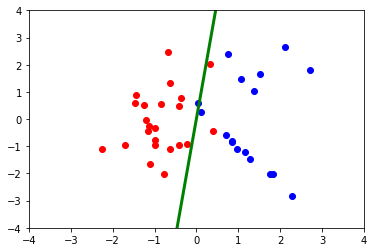

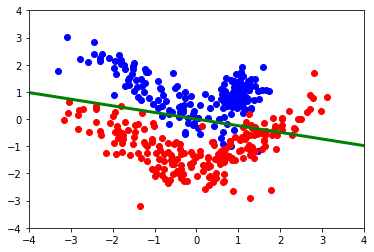

In [27]:
functionGraphCreation(train_x1, train_t1, wts1)
functionGraphCreation(train_x2, train_t2, wts2)